Nasze zadanie polegało na znalezieniu odpowiedzi na pytanie, kto miał największe szanse na przeżycie na Titanicu posiadając dane o wieku, płci etc.

In [8]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

#Ścieżka do wczytania pliku
train = io.BytesIO(uploaded['train.csv'])

#Wczytanie pliku do zmiennej train
train = pd.read_csv(train)


Saving train.csv to train.csv


In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Liczba kobiet: 314
Liczba kobiet, które przeżyły: 233
Liczba kobiet, które zmarły: 81
Liczba mężczyzn: 577
Liczba mężczyzn, którzy przeżyli: 109
Liczba mężczyzn, którzy zmarli: 468


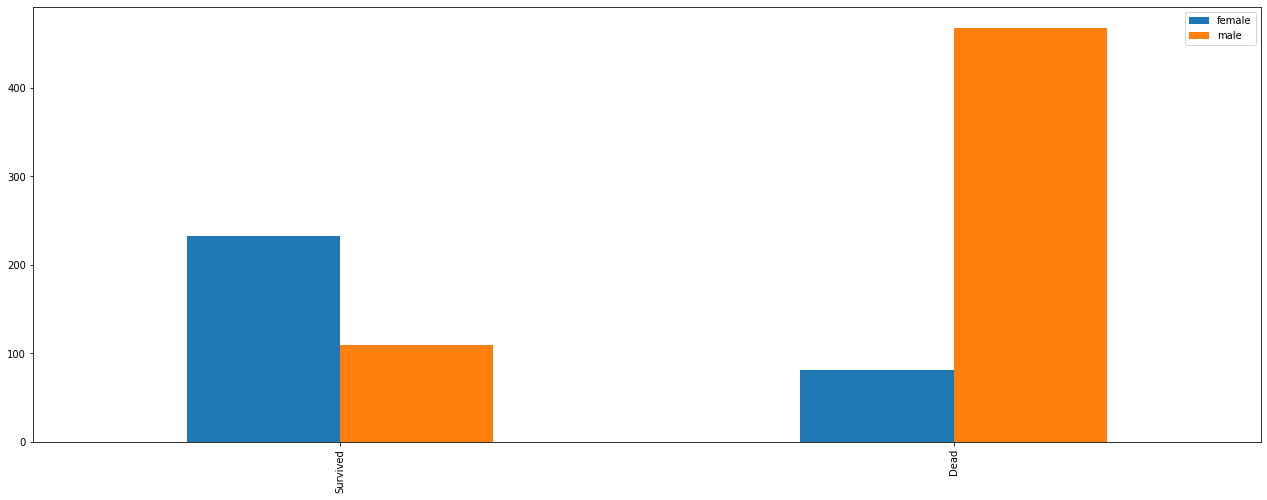

In [11]:
# Fuknkcja zwracająca na wykresie ilości kobiet i mężczyzn, które przeżyły/zginęły
def bar_chart(dana):
    Survived = train[train['Survived']==1][dana].value_counts()
    Dead = train[train['Survived']==0][dana].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=False, figsize=(22,8))
bar_chart('Sex')
# liczbowe dane dotyczące osób, które przeżyły/zginęły
kobiety = train.loc[train.Sex == 'female']["Survived"]
Dead_kobiety = len(kobiety)-sum(kobiety)
print("Liczba kobiet:", len(kobiety))
print("Liczba kobiet, które przeżyły:", sum(kobiety))
print("Liczba kobiet, które zmarły:", Dead_kobiety)

mezczyzni = train.loc[train.Sex == 'male']["Survived"]
Dead_mezczyzni = len(mezczyzni)-sum(mezczyzni)
print("Liczba mężczyzn:", len(mezczyzni))
print("Liczba mężczyzn, którzy przeżyli:", sum(mezczyzni))
print("Liczba mężczyzn, którzy zmarli:", Dead_mezczyzni)

In [12]:
# Biorę pod uwagę tylko 3 parametry(płeć, klasę w jakiej podróżowali i wiek)
dana= ['Sex','Pclass','Age']
# dodaję nowe zmienne x i y
x = train[dana]
y = train['Survived']
x.head()

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0


In [13]:
x.isnull().sum() # sprawdzam ile osób nie ma wpisanego wieku

Sex         0
Pclass      0
Age       177
dtype: int64

Widać, że 177 osób nie ma przypisanego wieku, więc warto w jakiś sposób wypełnić te dane. Dane wypełniam za pomocą polecenia median, czyli biorę środkowy wiek spośród wszyskich.

In [14]:
x['Age'] = x['Age'].fillna(x['Age'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
x.isnull().sum()

Sex       0
Pclass    0
Age       0
dtype: int64

In [16]:
# Kolumna "Sex" została zmodyfikowana. Zamieniam "male" i "female" na odpowiednio "1" i "0"
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
x.head() # sprawdzam czy zamiana przebiegła pomyślnie

,Sex,Pclass,Age
0,1,3,22.0
1,0,1,38.0
2,0,3,26.0
3,0,1,35.0
4,1,3,35.0


In [18]:
#Tworzenie modeli celem sprawdzenia, który jest najlepszy
model_decision_tree = DecisionTreeClassifier()
model_logisticRegression = LogisticRegression() 
model_svc = SVC()
model_perceptron = Perceptron()
model_random_forest = RandomForestClassifier()

In [63]:
#Funkcja train_test_split przyjmuje nowe zmienne
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 1)

In [64]:
#Dopasowanie modeli z wykorzystaniem danych treningowych
model_decision_tree.fit(train_x, train_y)
model_logisticRegression.fit(train_x, train_y)
model_svc.fit(train_x, train_y)
model_perceptron.fit(train_x, train_y)
model_random_forest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
#Poniższy fragment kodu jest analogiczny z wgrywaniem pliku "train.csv"
uploaded = files.upload()

#Ścieżka do wczytania pliku
test = io.BytesIO(uploaded['test.csv'])

#Wczytanie pliku do zmiennej test
test = pd.read_csv(test)

Saving test.csv to test.csv


In [65]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test_x = test[dana] # analogicznie jak wyżej
test_x.head()

,Sex,Pclass,Age
0,male,3,34.5
1,female,3,47.0
2,male,2,62.0
3,male,3,27.0
4,female,3,22.0


In [67]:
test_x.isnull().sum()

Sex        0
Pclass     0
Age       86
dtype: int64

In [68]:
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median()) # analogicznie jak wyżej

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
test_x.isnull().sum()

Sex       0
Pclass    0
Age       0
dtype: int64

In [70]:
test_x['Sex'] = LE.fit_transform(test_x['Sex'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Poszczególne algorytmy są przestawione jako wartości procentowe z dokładnością do 2 miejsc po przecinku
  

In [71]:
prognozuj_wynik_DT = model_decision_tree.predict(test_x)
wynik_decision_tree = round(model_decision_tree.score(val_x, val_y) * 100, 2)
wynik_decision_tree


78.03

In [73]:
prognozuj_wynik_LR = model_logisticRegression.predict(test_x)
wynik_logreg = round(model_logisticRegression.score(val_x, val_y) * 100, 2)
wynik_logreg

80.72

In [34]:
prognozuj_wynik_P = model_perceptron.predict(test_x)
wynik_perceptron = round(model_perceptron.score(val_x, val_y) * 100, 2)
wynik_perceptron

72.2

In [35]:
prognozuj_wynik_SVC = model_svc.predict(test_x)
wynik_svc = round(model_svc.score(val_x, val_y) * 100, 2)
wynik_svc

56.5

In [37]:
prognozuj_wynik_RF = model_random_forest.predict(test_x)
wynik_random_forest = round(model_random_forest.score(val_x, val_y) * 100, 2)
wynik_random_forest

78.92

Dane zebrane w jednej tabeli od najlepszego do najgorszego algorytmu:

In [74]:
output = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'Perceptron', 'Random Forest','Decision Tree'],
    'Końcowy wynik': [wynik_logreg, wynik_svc,
              wynik_perceptron, wynik_random_forest, wynik_decision_tree]})
output.sort_values(by='Końcowy wynik', ascending=False)

,Model,Końcowy wynik
0,Logistic Regression,80.72
3,Random Forest,78.92
4,Decision Tree,78.03
2,Perceptron,72.20
1,Support Vector Machines,56.50


In [78]:
output = pd.DataFrame({'PassengerId': test["PassengerId"], 'Survived': prognozuj_wynik_LR})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [79]:
output.groupby(['Survived'])['Survived'].count()

Survived
0    260
1    158
Name: Survived, dtype: int64

Jak widać model jest bardziej optymistyczny niż jest to w rzeczywsitości. Prawdopodbnie ma to związek ze zbyt małą ilością paramterów użytych do analizy.